## Import the dependencies

In [1]:
import keras

from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras import regularizers, optimizers

import numpy as np
from matplotlib import pyplot

## Get the data ready for training

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [3]:
print('x_train =', x_train.shape)
print('x_valid =', x_valid.shape)
print('x_test =', x_test.shape)

x_train = (45000, 32, 32, 3)
x_valid = (5000, 32, 32, 3)
x_test = (10000, 32, 32, 3)


### Normalize the data

In [4]:
mean = np.mean(x_train, axis=(0, 1, 2, 3))
std = np.std(x_train, axis=(0, 1, 2, 3))

x_train = (x_train - mean) / (std + 1e-7)
x_valid = (x_valid - mean) / (std + 1e-7)
x_test = (x_test - mean) / (std + 1e-7)

### One-hot encode the labels

In [5]:
num_classes = 10

y_train = np_utils.to_categorical(y_train, num_classes)
y_valid = np_utils.to_categorical(y_valid, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

### Data augmentation

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )

datagen.fit(x_train)

## Build the model architecture

In [7]:
# base_hidden_units - number of hidden units variable
# weight_decay - L2 regularization hyperparameter

def get_model(base_hidden_units=32, weight_decay=1e-4):
    md = Sequential()
    
    # CONV_1
    md.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay),
                  input_shape=x_train.shape[1:]))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # CONV_2
    md.add(Conv2D(base_hidden_units, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # POOL + Dropout
    md.add(MaxPooling2D(pool_size=(2,2)))
    md.add(Dropout(0.2))
    
    # CONV_3
    md.add(Conv2D(base_hidden_units * 2, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # CONV_4
    md.add(Conv2D(base_hidden_units * 2, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # POOL + Dropout
    md.add(MaxPooling2D(pool_size=(2,2)))
    md.add(Dropout(0.3))
    
    # CONV_5
    md.add(Conv2D(base_hidden_units * 4, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # CONV_6
    md.add(Conv2D(base_hidden_units * 4, kernel_size=3, padding='same',
                  kernel_regularizer=regularizers.l2(weight_decay)))
    md.add(Activation('relu'))
    md.add(BatchNormalization())
    
    # POOL + Dropout
    md.add(MaxPooling2D(pool_size=(2,2)))
    md.add(Dropout(0.4))
    
    # FC_7
    md.add(Flatten())
    md.add(Dense(10, activation='softmax'))
    
    return md

In [8]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

## Train the model

In [20]:
batch_size = 128
epochs = 125
model_file_path = 'high_acc_mod_cifar10.hdf5'

checkpointer = ModelCheckpoint(filepath=model_file_path, verpose=1,
                               save_best_only=True)

optimizer = tensorflow.optimizers.Adam(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])

history = model.fit_generator(datagen.flow(x_train, y_train,
                                           batch_size=batch_size), 
                              callbacks=[checkpointer],
                              steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs,
                              verbose=2, validation_data=(x_valid, y_valid))

/home/biba_bo/.local/lib/python3.6/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/125
351/351 - 21s - loss: 2.8354 - accuracy: 0.2747 - val_loss: 2.1116 - val_accuracy: 0.2862
Epoch 2/125
351/351 - 18s - loss: 2.1172 - accuracy: 0.3625 - val_loss: 1.4777 - val_accuracy: 0.4888
Epoch 3/125
351/351 - 17s - loss: 1.8742 - accuracy: 0.4015 - val_loss: 1.4306 - val_accuracy: 0.5070
Epoch 4/125
351/351 - 18s - loss: 1.7339 - accuracy: 0.4329 - val_loss: 1.4224 - val_accuracy: 0.5120
Epoch 5/125
351/351 - 18s - loss: 1.6403 - accuracy: 0.4639 - val_loss: 1.3526 - val_accuracy: 0.5386
Epoch 6/125
351/351 - 18s - loss: 1.5661 - accuracy: 0.4902 - val_loss: 1.3353 - val_accuracy: 0.5476
Epoch 7/125
351/351 - 19s - loss: 1.4823 - accuracy: 0.5075 - val_loss: 1.2727 - val_accuracy: 0.5696
Epoch 8/125
351/351 - 18s - loss: 1.4159 - accuracy: 0.5315 - val_loss: 1.3415 - val_accuracy: 0.5468
Epoch 9/125
351/351 - 19s - loss: 1.3625 - accuracy: 0.5447 - val_loss: 1.2316 - val_accuracy: 0.5784
Epoch 10/125
351/351 - 19s - loss: 1.3052 - accuracy: 0.5642 - val_loss: 1.2001 - 

## Evaluate the model

In [21]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('Test result: %.3f loss: %.3f' % (scores[1] * 100, scores [0]))

79/79 [==============================] - 1s 11ms/step - loss: 0.4935 - accuracy: 0.8494
Test result: 84.940 loss: 0.493


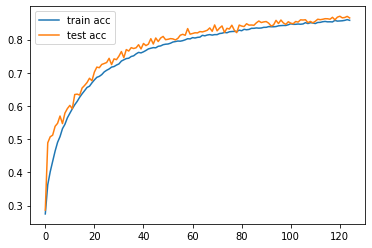

In [25]:
pyplot.plot(history.history['accuracy'], label='train acc')
pyplot.plot(history.history['val_accuracy'], label='test acc')
pyplot.legend()
pyplot.show()

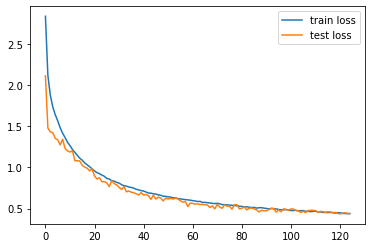

In [24]:
pyplot.plot(history.history['loss'], label='train loss')
pyplot.plot(history.history['val_loss'], label='test loss')
pyplot.legend()
pyplot.show()